In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('D://DS//titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [4]:
df[df['embarked'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,NaN
284,1.0,1.0,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0.0,0.0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['caqbin_null'] = np.where(df['cabin'].isnull(),1,0)

In [6]:
#find the % NAN values

df['caqbin_null'].mean()

0.7748091603053435

In [7]:
df.groupby(['survived'])['caqbin_null'].mean()

survived
0.0    0.873918
1.0    0.614000
Name: caqbin_null, dtype: float64

### Mean/ Median/Mode Imputation

In [8]:
df = pd.read_csv('D://DS//titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,1.0,29.0000,211.3375
1,1.0,0.9167,151.5500
2,0.0,2.0000,151.5500
3,0.0,30.0000,151.5500
4,0.0,25.0000,151.5500


In [9]:
df.isnull().mean()

survived    0.000763
age         0.201527
fare        0.001527
dtype: float64

In [10]:
def impute_nan(df,variable,median):
    df[variable + "_median"] = df[variable].fillna(median)

In [11]:
median = df.age.median()
median

28.0

In [12]:
impute_nan(df,'age',median)
df.head()

,survived,age,fare,age_median
0,1.0,29.0000,211.3375,29.0000
1,1.0,0.9167,151.5500,0.9167
2,0.0,2.0000,151.5500,2.0000
3,0.0,30.0000,151.5500,30.0000
4,0.0,25.0000,151.5500,25.0000


In [13]:
df['age'].std()

14.413499699923594

In [14]:
df['age_median'].std()

12.900382783169142

In [15]:
import matplotlib.pyplot as plt


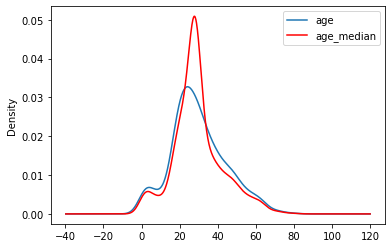

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_median.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Random Sample Imputation

In [17]:
df = pd.read_csv('D://DS//titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,1.0,29.0000,211.3375
1,1.0,0.9167,151.5500
2,0.0,2.0000,151.5500
3,0.0,30.0000,151.5500
4,0.0,25.0000,151.5500


In [18]:
df.isnull().sum()

survived      1
age         264
fare          2
dtype: int64

In [19]:
df.isnull().mean()

survived    0.000763
age         0.201527
fare        0.001527
dtype: float64

In [21]:
df['age'].isnull().sum()

264

In [22]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

1203    40.0
919     18.5
703     21.0
853     25.0
722     24.0
        ... 
712     24.0
39      48.0
1158    41.0
180     39.0
43      60.0
Name: age, Length: 264, dtype: float64

In [23]:
median = df.age.median()
median

28.0

In [24]:
def impute_nan(df,variable,median):
    df[variable + '_median'] = df[variable].fillna(median)
    df[variable + '_random'] = df[variable]
    ## it will have the random sample to fill na/
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas needs to have same index in order tp merge dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [25]:
impute_nan(df,"age",median)

In [27]:
df.head()

,survived,age,fare,age_median,age_random
0,1.0,29.0000,211.3375,29.0000,29.0000
1,1.0,0.9167,151.5500,0.9167,0.9167
2,0.0,2.0000,151.5500,2.0000,2.0000
3,0.0,30.0000,151.5500,30.0000,30.0000
4,0.0,25.0000,151.5500,25.0000,25.0000


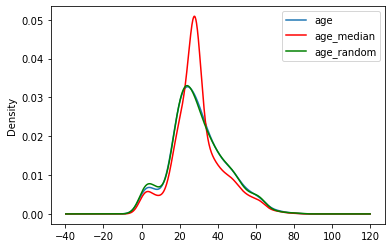

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df.age_median.plot(kind='kde',ax=ax,color='red')
df.age_random.plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Capturing NaN value with a new feature

In [30]:
df = pd.read_csv('D://DS//titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,1.0,29.0000,211.3375
1,1.0,0.9167,151.5500
2,0.0,2.0000,151.5500
3,0.0,30.0000,151.5500
4,0.0,25.0000,151.5500


In [31]:
df.isnull().sum()

survived      1
age         264
fare          2
dtype: int64

In [32]:
df['age_NA'] = np.where(df['age'].isnull(),1,0)

In [33]:
df.head()

,survived,age,fare,age_NA
0,1.0,29.0000,211.3375,0
1,1.0,0.9167,151.5500,0
2,0.0,2.0000,151.5500,0
3,0.0,30.0000,151.5500,0
4,0.0,25.0000,151.5500,0


In [34]:
df.age.fillna(df.age.mean()).inplace=True

In [36]:
df.head(10)

,survived,age,fare,age_NA
0,1.0,29.0000,211.3375,0
1,1.0,0.9167,151.5500,0
2,0.0,2.0000,151.5500,0
3,0.0,30.0000,151.5500,0
4,0.0,25.0000,151.5500,0
5,1.0,48.0000,26.5500,0
6,1.0,63.0000,77.9583,0
7,0.0,39.0000,0.0000,0
8,1.0,53.0000,51.4792,0
9,0.0,71.0000,49.5042,0


### End of Distribution Imputation

In [37]:
df = pd.read_csv('D://DS//titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,1.0,29.0000,211.3375
1,1.0,0.9167,151.5500
2,0.0,2.0000,151.5500
3,0.0,30.0000,151.5500
4,0.0,25.0000,151.5500


<AxesSubplot:>

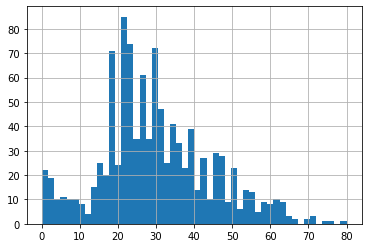

In [38]:
df.age.hist(bins=50)

In [47]:
extreme = df.age.mean() + 3 * df.age.std()

In [41]:
df.age.mean() + 2 * df.age.std()

58.708133912275485

In [42]:
df.age.mean() + 1 * df.age.std()

44.294634212351895

In [43]:
df.age.mean()

29.8811345124283

In [44]:
df.age.std()

14.413499699923594

In [45]:
import seaborn as sns

C:\Users\rohit.pratapwar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

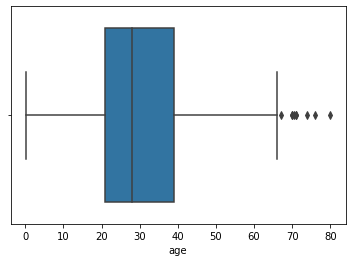

In [46]:
sns.boxplot('age',data=df)

In [48]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [49]:
impute_nan(df,'age',df.age.median(),extreme)

In [50]:
df.head()

,survived,age,fare,age_end_distribution
0,1.0,29.0000,211.3375,29.0000
1,1.0,0.9167,151.5500,0.9167
2,0.0,2.0000,151.5500,2.0000
3,0.0,30.0000,151.5500,30.0000
4,0.0,25.0000,151.5500,25.0000


<AxesSubplot:>

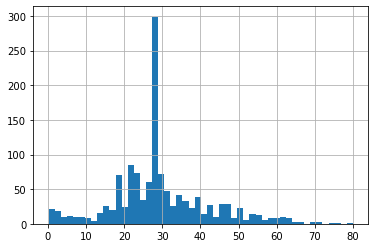

In [51]:
df['age'].hist(bins=50)

<AxesSubplot:>

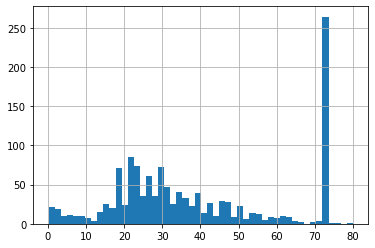

In [52]:
df['age_end_distribution'].hist(bins=50)

C:\Users\rohit.pratapwar\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_end_distribution'>

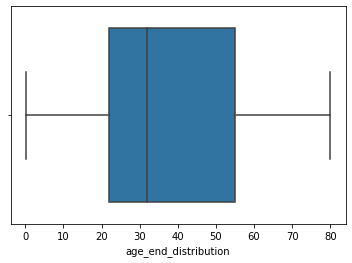

In [53]:
sns.boxplot('age_end_distribution',data=df)

### Arbitrary imputation

In [54]:
df = pd.read_csv('D://DS//titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,1.0,29.0000,211.3375
1,1.0,0.9167,151.5500
2,0.0,2.0000,151.5500
3,0.0,30.0000,151.5500
4,0.0,25.0000,151.5500


In [57]:
def impute_nan(df,variable):
    df[variable+'_zero'] =  df[variable].fillna(0)
    df[variable+'_hundred'] =  df[variable].fillna(100)

<AxesSubplot:>

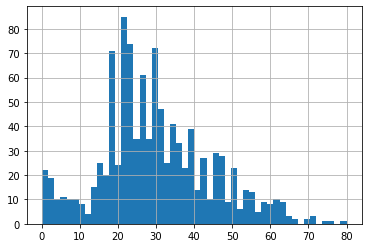

In [58]:
df['age'].hist(bins=50)

In [56]:
### It should not be more frequently present